## Logistic regression

Logistic regression is classification method which is a bit similar to linear regression, but used for categorical dependent variable. Instead of predicting a value of the target variable, which is assumed to be linear, logistic regression tries to predict the probabilities of a binary response. Some common examples are:

* marking an email as a spam
* marking given medical image as possible illness

For the classification we use a logistic function:

\begin{align}
p = \frac{1}{1 + e^{-(b_{0} + b_{1}x)}}
\end{align}

Let's consider the same dataset like in the example of linear regression. This time, we are not going to predict an exact price, but instead would like to know if given zone is expensive when it comes to a median of value. First of all, we need to consider which examples should be thought to be expensive.

In [1]:
# Show some statistics about the dataset
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

# Loading the dataset with pandas
boston_data = load_boston()
boston_housing_df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston_housing_df["MEDV"] = boston_data.target
boston_housing_df.head()

boston_housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


A mean of *medv* is 22.768769. By a simple thresholding we'll add another feature to our dataset, called **is_expensive** which will be set to 1 whenever the median value is higher than the mean.

In [2]:
# Get the mean value of the medv as a threshold
IS_EXPENSIVE_THRESHOLD = boston_housing_df["MEDV"].mean()

# Append a new column to the dataset
boston_housing_df["is_expensive"] = boston_housing_df["MEDV"]\
    .map(lambda x: int(x > IS_EXPENSIVE_THRESHOLD))
boston_housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,is_expensive
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


The perfect predictor for the *is_expensive* variable is naturally *medv* feature, but we are not going to consider it. In one of the previous examples we found out that column *lstat* has the highest absolute correlation with *medv*, so for the 2D example we will consider it as an independent variable. 

### 2D logistic regression

For the intuition, we are going to plot the *lstat* feature with *is_expensive* first, and then apply logistic regression to find, what is a threshold found by the algorithm itself.

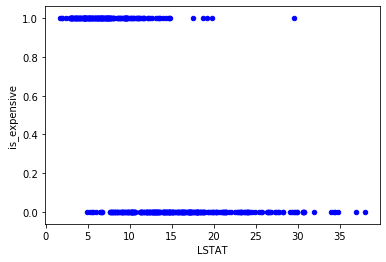

In [3]:
# Display a scatter plot: lstat vs is_expensive
boston_housing_df.plot.scatter(x="LSTAT", y="is_expensive", color="blue")

In [4]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression and fit it
logistic_regression = LogisticRegression()
logistic_regression.fit(X=boston_housing_df[["LSTAT"]], 
                        y=boston_housing_df["is_expensive"])

# Check the coefficients of the created model
logistic_regression.coef_, logistic_regression.intercept_

(array([[-0.43645866]]), array([4.33565677]))

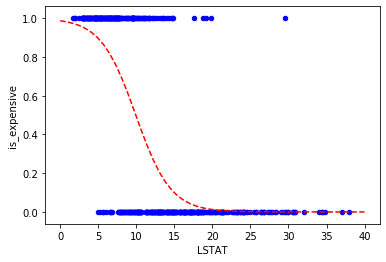

In [5]:
import matplotlib.pyplot as plt

# Calculating the value of the logistic function
x_values = np.linspace(0, 40)
y_values = 1.0 / (1.0 + np.exp(-(logistic_regression.coef_[0] * x_values + logistic_regression.intercept_[0])))

# Display a scatter plot: lstat vs is_expensive and logistic function
boston_housing_df.plot(x="LSTAT", y="is_expensive", color="blue", kind="scatter")
plt.plot(x_values, y_values, color="red", linestyle="dashed")

With a simple thresholing we may perform a classification - if the *is_expensive* value returned by the classifier is higher than 50%, we can consider it to be expensive.

### Multidimensional logistic regression

Once again, we will consider an example with two independent variables, in order to visualize the predictions in the 3-dimensional space. As the most correlated values are typically the best predictors for the linear models, we are going to consider *lstat* together with *rm*.

In [6]:
from sklearn.preprocessing import StandardScaler

# Scale the original dataset first, and then run regression
scaler = StandardScaler()
boston_housing_lstatrm_scaled = scaler.fit_transform(
    boston_housing_df[["LSTAT", "RM"]])

# Create an instance of LogisticRegression and fit it
logistic_regression = LogisticRegression()
logistic_regression.fit(X=boston_housing_lstatrm_scaled, 
                        y=boston_housing_df["is_expensive"])

# Check the coefficients of the created model
logistic_regression.coef_, logistic_regression.intercept_

(array([[-2.42328339,  0.87415551]]), array([-0.94370746]))

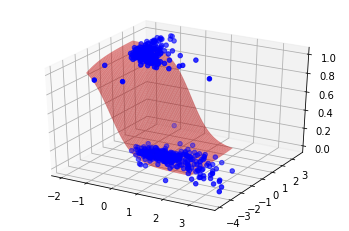

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Save the coefficients in a single array
coefficients = np.append(logistic_regression.coef_[0],
                         logistic_regression.intercept_[0])

# Calculate the values for a selected range
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
x_values, y_values = np.meshgrid(x, y)
z_values = 1.0 / (1.0 + np.exp(-(coefficients[0] * x_values + coefficients[1] * y_values + coefficients[2])))

# Display 3D scatter: rm, lstat vs is_expensive and logistic function
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(boston_housing_lstatrm_scaled[:, 0], 
           boston_housing_lstatrm_scaled[:, 1], 
           boston_housing_df["is_expensive"], c="blue")
ax.plot_surface(x_values, y_values, z_values, linewidth=0.2, 
                color="red", alpha=0.5)
plt.show()